<a href="https://colab.research.google.com/github/Reshmitha-Mudunuri/Python-Programming-Lab/blob/main/colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gradio

     |████████████████████████████████| 649 kB 14.0 MB/s 
     |████████████████████████████████| 210 kB 73.8 MB/s 
     |████████████████████████████████| 84 kB 3.5 MB/s 
     |████████████████████████████████| 53 kB 2.8 MB/s 
     |████████████████████████████████| 2.0 MB 63.9 MB/s 
     |████████████████████████████████| 255 kB 76.0 MB/s 
     |████████████████████████████████| 53 kB 300 kB/s 
     |████████████████████████████████| 1.1 MB 57.8 MB/s 
     |████████████████████████████████| 144 kB 70.8 MB/s 
     |████████████████████████████████| 94 kB 4.3 MB/s 
     |████████████████████████████████| 271 kB 77.4 MB/s 
     |████████████████████████████████| 10.9 MB 54.3 MB/s 
     |████████████████████████████████| 58 kB 7.8 MB/s 
     |████████████████████████████████| 79 kB 11.0 MB/s 
     |████████████████████████████████| 43 kB 2.8 MB/s 
     |████████████████████████████████| 856 kB 55.9 MB/s 
     |████████████████████████████████| 3.6 MB 56.0 MB/s 
     |████████████████████

In [ ]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 16s 3ms/step - loss: 0.2096 - accuracy: 0.9370
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0866 - accuracy: 0.9742
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0623 - accuracy: 0.9808
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0472 - accuracy: 0.9852
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0379 - accuracy: 0.9873
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0327 - accuracy: 0.9891
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0275 - accuracy: 0.9910
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0255 - accuracy: 0.9912
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0200 - accuracy: 0.9931
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.01

In [ ]:
model.evaluate(x_test, y_test)
import matplotlib.pyplot as plt

313/313 [==============================] - 1s 2ms/step - loss: 0.0583 - accuracy: 0.9842


2


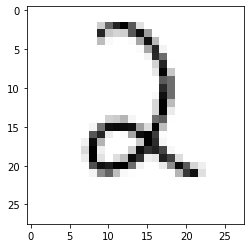

In [ ]:
image_index = 47
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

In [ ]:
scores=model.evaluate(x_test,y_test)
print('Accuracy:', scores[1]*100)


313/313 [==============================] - 1s 2ms/step - loss: 0.0583 - accuracy: 0.9842
Accuracy: 98.42000007629395


In [ ]:
#hist = model.fit(x_train, y_train,verbose=1,validation_data=(x_test, y_test))
#print("The model has successfully trained")
model.save('mnist.h5')
print("Saving the bot as mnist.h5")

Saving the bot as mnist.h5


In [ ]:
import gradio as gr

In [1]:
def classify(input):
    prediction = model.predict(input.reshape(1, 28, 28)).tolist()[0]
    return {str(i): prediction[i] for i in range(10)}

label = gr.outputs.Label(num_top_classes=3)
interface = gr.Interface(fn=classify, inputs="sketchpad", outputs=label, 
live=True)
interface.launch()

NameError: ignored